ivancloudvm@gmail.com
# Problema Categórico - Iris Dataset 

### Analizamos 2 datasets de sklearn, iris y digits, usando el modelo SVC y después usando GridSearch para encontrar los mejores parámetros para una mejor precisión.

In [195]:
#Importamos algunas librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importamos la libreria de los datos:
from sklearn.datasets import load_iris

In [196]:
#Cargamos los datos en iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

df["target"]= iris.target 
df["target_names"] = df.target.apply(lambda x: iris.target_names[x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Graficamos:

In [116]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

print(df0.shape, df1.shape, df2.shape, sep= "\n" )


(50, 6)
(50, 6)
(50, 6)


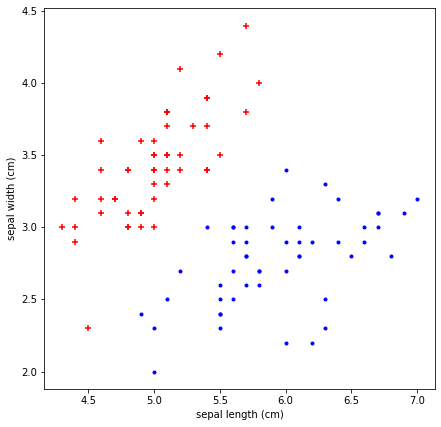

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"], color = "red",marker = "+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"], color = "blue",marker = ".")

### Probemos con la libreria Seaborn:

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

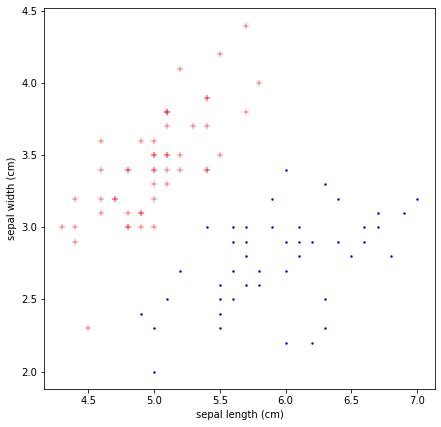

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

sns.scatterplot(x = df0["sepal length (cm)"],y = df0["sepal width (cm)"], color = "red",marker = "+")
sns.scatterplot(x = df1["sepal length (cm)"], y = df1["sepal width (cm)"], color = "blue",marker = ".")

### Cambiamos las features:

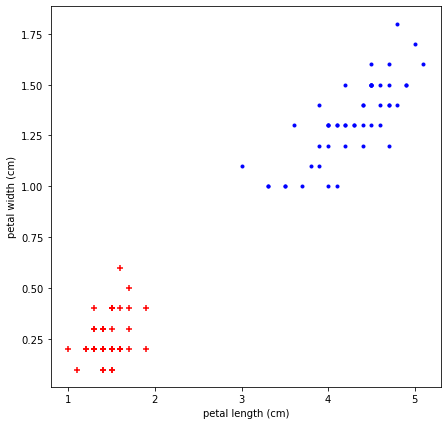

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"], color = "red",marker = "+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"], color = "blue",marker = ".")

Claramente podemos usar el modelo SCV para clasificar los datos

In [120]:
from sklearn.model_selection import train_test_split

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Definimos las variables predictoras y target:

In [121]:
X = df.drop(['target','target_names'],axis = "columns")

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [122]:
y = df.target

### Separamos los datos de entrenamiento y prueba:

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

### Importamos el modelo SVC, lo entrenamos y veamos la precision que da:

In [124]:
from sklearn.svm import SVC

model = SVC()

In [125]:
model.fit(X_train, y_train)

SVC()

In [126]:
model.score(X_test,y_test)

1.0

## Ejercicio: En el dataset digits nos interesa encontrar los parametros del modelo SVC que nos dan la mejor precision:

In [127]:
#importamos la libreria de los datos:
from sklearn.datasets import load_digits

In [128]:
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [129]:
df_digits = pd.DataFrame(digits.data,columns = digits.feature_names)

df_digits["target"] = digits.target

df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [190]:
X = df_digits.drop("target", axis = "columns")
y = df_digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4)

model = SVC(C= 1.,kernel = "rbf")


In [191]:
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.9819193324061196

### Usamos GridSearch para encontrar el modelo y parametros más adecuados:

In [192]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [194]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.899321,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
